In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import category_encoders as ce
from sklearn.preprocessing import *

# 1. Reading Data

In [3]:
train_df = pd.read_csv('./dataset/train.csv', index_col='id')
test_df = pd.read_csv('./dataset/test.csv', index_col='id')
submission_df = pd.read_csv('./dataset/sample_submission.csv', index_col='id')

In [4]:
train_df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 

In [6]:
for i in train_df.columns.values:
    print(i, 'has', train_df[i].value_counts().shape[0], 'unique values')

bin_0 has 2 unique values
bin_1 has 2 unique values
bin_2 has 2 unique values
bin_3 has 2 unique values
bin_4 has 2 unique values
nom_0 has 3 unique values
nom_1 has 6 unique values
nom_2 has 6 unique values
nom_3 has 6 unique values
nom_4 has 4 unique values
nom_5 has 222 unique values
nom_6 has 522 unique values
nom_7 has 1220 unique values
nom_8 has 2215 unique values
nom_9 has 11981 unique values
ord_0 has 3 unique values
ord_1 has 5 unique values
ord_2 has 6 unique values
ord_3 has 15 unique values
ord_4 has 26 unique values
ord_5 has 192 unique values
day has 7 unique values
month has 12 unique values
target has 2 unique values


In [7]:
# Checking if dataset is unbalanced
train_df['target'].value_counts()

0    208236
1     91764
Name: target, dtype: int64

# 2. Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, mean_squared_error, confusion_matrix, accuracy_score

import seaborn as sns

In [9]:
def handle_binary_values(df):
    df['bin_3'] = df['bin_3'].map({'T':1, 'F':0})
    df['bin_4'] = df['bin_4'].map({'Y':1, 'N':0})

In [10]:
def handle_categorial_features(df, encoder):
    
    X = df.drop('target', axis=1)
    y = df['target']
    
    categorical_features=[]
    for i in X.columns:
        if 'bin' not in i:
            categorical_features.append(i)
    
    #encoder = ce.OrdinalEncoder()
    df = encoder.fit_transform(X, y).reset_index(drop=True)
    
    return pd.concat([df,y], axis=1)

In [11]:
#temp = handle_categorial_features(train_df)
#temp.head(5)

In [12]:
handle_binary_values(train_df)
train_df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [18]:
def train_encoding_on_model(train_df):
    #handle_binary_values(train_df)
    #The commented ones cause MemoryError
    encoders = [
        ce.OrdinalEncoder(), 
        #ce.OneHotEncoder(),
        #ce.BinaryEncoder(),
        #ce.BaseNEncoder(base=10),
        ce.HashingEncoder(),
        ce.CountEncoder(),

        #ce.HelmertEncoder(),
        #ce.SumEncoder(),
        #ce.BackwardDifferenceEncoder(),
        #ce.PolynomialEncoder(),

        ce.TargetEncoder(),
        ce.LeaveOneOutEncoder(),
        ce.WOEEncoder()
    ]
    
    lst=[]
    for en in encoders:
        print(f'\nUsing {type(en).__name__}')
        df = handle_categorial_features(train_df, en)
        X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), 
                                                            df['target'], test_size=0.33, random_state=42)
        print('Starting model building')
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_pred, y_test)
        roc = roc_auc_score(y_pred, y_test)
        mse = mean_squared_error(y_pred, y_test)
        
        print('accuracy=', acc)
        print('roc_auc score=', roc)
        print('mse=', mse)
        sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='d', cmap='Greys', cbar=False, linewidths = 1, square= True)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Confusion Matrix')
        plt.show()           
        lst.append((type(en).__name__, acc, roc, mse))
    return lst


Using OrdinalEncoder
Starting model building
accuracy= 0.6128484848484849
roc_auc score= 0.5496169967901743
mse= 0.38715151515151514


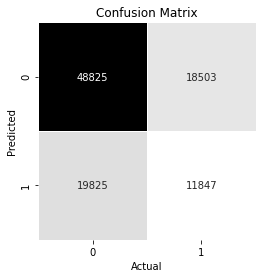


Using HashingEncoder
Starting model building
accuracy= 0.5828888888888889
roc_auc score= 0.51936736269613
mse= 0.4171111111111111


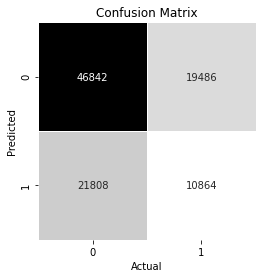


Using CountEncoder
Starting model building
accuracy= 0.6074141414141414
roc_auc score= 0.5445283057954193
mse= 0.3925858585858586


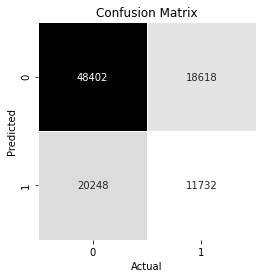


Using TargetEncoder


C:\Users\Ankit\anaconda3\envs\ml\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Starting model building
accuracy= 0.6712828282828283
roc_auc score= 0.6155531560190134
mse= 0.32871717171717174


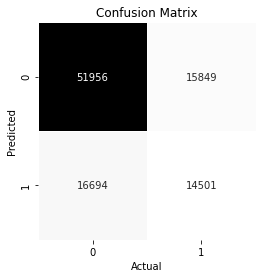


Using LeaveOneOutEncoder
Starting model building
accuracy= 1.0
roc_auc score= 1.0
mse= 0.0


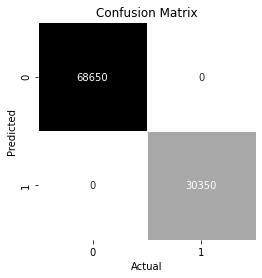


Using WOEEncoder


C:\Users\Ankit\anaconda3\envs\ml\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Starting model building
accuracy= 0.6723434343434344
roc_auc score= 0.6168143503868492
mse= 0.32765656565656565


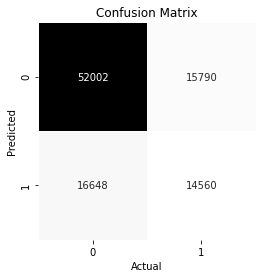

In [19]:
lst = train_encoding_on_model(train_df)

In [20]:
for i in lst:
    print(i)

('OrdinalEncoder', 0.6128484848484849, 0.5496169967901743, 0.38715151515151514)
('HashingEncoder', 0.5828888888888889, 0.51936736269613, 0.4171111111111111)
('CountEncoder', 0.6074141414141414, 0.5445283057954193, 0.3925858585858586)
('TargetEncoder', 0.6712828282828283, 0.6155531560190134, 0.32871717171717174)
('LeaveOneOutEncoder', 1.0, 1.0, 0.0)
('WOEEncoder', 0.6723434343434344, 0.6168143503868492, 0.32765656565656565)


In [37]:
temp = pd.DataFrame(lst, columns=['encoding', 'accuracy', 'roc', 'mse'])
temp

,encoding,accuracy,roc,mse
0,OrdinalEncoder,0.612848,0.549617,0.387152
1,HashingEncoder,0.582889,0.519367,0.417111
2,CountEncoder,0.607414,0.544528,0.392586
3,TargetEncoder,0.671283,0.615553,0.328717
4,LeaveOneOutEncoder,1.000000,1.000000,0.000000
5,WOEEncoder,0.672343,0.616814,0.327657


In [42]:
temp.transpose().iloc[1:]

,0,1,2,3,4,5
accuracy,0.612848,0.582889,0.607414,0.671283,1.0,0.672343
roc,0.549617,0.519367,0.544528,0.615553,1.0,0.616814
mse,0.387152,0.417111,0.392586,0.328717,0.0,0.327657


In [39]:
temp

,encoding,accuracy,roc,mse
0,OrdinalEncoder,0.612848,0.549617,0.387152
1,HashingEncoder,0.582889,0.519367,0.417111
2,CountEncoder,0.607414,0.544528,0.392586
3,TargetEncoder,0.671283,0.615553,0.328717
4,LeaveOneOutEncoder,1.000000,1.000000,0.000000
5,WOEEncoder,0.672343,0.616814,0.327657


In [43]:
df = handle_categorial_features(train_df, ce.LeaveOneOutEncoder())
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), 
                                                    df['target'], test_size=0.33, random_state=42)
print('Starting model building')
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_pred, y_test)
roc = roc_auc_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

Starting model building


accuracy= 1.0
roc_auc score= 1.0
mse= 0.0


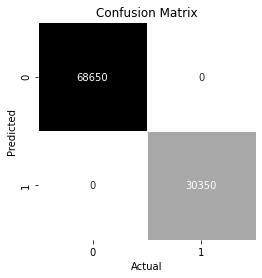

In [44]:
print('accuracy=', acc)
print('roc_auc score=', roc)
print('mse=', mse)
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='d', cmap='Greys', cbar=False, linewidths = 1, square= True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()           

In [45]:
y_pred = model.predict(X_train)
print('Training Model')
print('accuracy=', accuracy_score(y_pred, y_train))
print('roc_auc score=', roc_auc_score(y_pred, y_train))
print('mse=', mean_squared_error(y_pred, y_train))

y_pred = model.predict(X_test)
print('Training Model')
print('accuracy=', accuracy_score(y_pred, y_test))
print('roc_auc score=', roc_auc_score(y_pred, y_test))
print('mse=', mean_squared_error(y_pred, y_test))

Training Model
accuracy= 1.0
roc_auc score= 1.0
mse= 0.0
Training Model
accuracy= 1.0
roc_auc score= 1.0
mse= 0.0


In [50]:
from sklearn.model_selection import StratifiedKFold

In [61]:
def train_model(train, test, fold_no):
    X_train = train.drop('target', axis=1)
    y_train = train['target']
    X_test = test.drop('target', axis=1)
    y_test = test['target']
    
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test,predictions))

In [63]:
fold_no = 1
df = handle_categorial_features(train_df, ce.LeaveOneOutEncoder())

model = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(df, df['target']):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 1.0
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 1.0
Fold 5 Accuracy: 1.0


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
fold_no = 1
df = handle_categorial_features(train_df, ce.LeaveOneOutEncoder())

model = LogisticRegression()
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(df, df['target']):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    train_model(train,test,fold_no)
    fold_no += 1

C:\Users\Ankit\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 Accuracy: 0.7527166666666667


C:\Users\Ankit\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 Accuracy: 0.7558833333333334


C:\Users\Ankit\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 Accuracy: 0.7596333333333334


C:\Users\Ankit\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 Accuracy: 0.7559
Fold 5 Accuracy: 0.7587166666666667


C:\Users\Ankit\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
handle_binary_values(test_df)
test_df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,1,1,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,1,0,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,0,1,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,1,1,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,0,0,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [68]:
encoder = ce.LeaveOneOutEncoder()
X = train_df.drop('target', axis=1)
y = train_df['target']

categorical_features=[]
for i in X.columns:
    if 'bin' not in i:
        categorical_features.append(i)

X = X[categorical_features]
#encoder = ce.OrdinalEncoder()
df = encoder.fit_transform(X, y).reset_index(drop=True)

In [69]:
df.head()

,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0.327148,0.360990,0.307169,0.242820,0.237746,0.358272,0.312990,0.233333,0.374074,0.388889,2,0.403890,0.257885,0.307005,0.208407,0.401980,2,2
1,0.327148,0.290057,0.359221,0.289957,0.304167,0.389381,0.263971,0.311189,0.190909,0.083333,1,0.403890,0.326330,0.206605,0.186887,0.303997,7,8
2,0.241793,0.290057,0.293087,0.289957,0.353958,0.274673,0.297089,0.206751,0.223827,0.178571,1,0.317188,0.403133,0.307005,0.351885,0.206923,7,2
3,0.351043,0.290047,0.307147,0.339780,0.329465,0.234086,0.363714,0.349206,0.321782,0.209302,1,0.403877,0.360951,0.330124,0.208155,0.355736,2,1
4,0.351056,0.290057,0.293087,0.339800,0.329476,0.312593,0.306228,0.273563,0.378641,0.205882,1,0.403890,0.225217,0.206605,0.351885,0.404487,7,8


In [72]:
for i in train_df.columns:
    if 'bin' in i:
        print(i)

bin_0
bin_1
bin_2
bin_3
bin_4
